___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 7<br><br>Image Classification with CNN<br><br>Malaria Data<br><h1>


# Dataset Info

The dataset contains 2 folders - 'parasitized', 'uninfected'

And a total of 27,558 images.

This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

# Import Libraries and Export Images from Zip_File

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# google drive'ı colab'e bağlamak için bunu çalıştırıp izin vermemiz gerekiyor.

In [ ]:
import zipfile # zip dosyalarıyla çalışmamızı sağlayan bir package

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/cell_images.zip", "r") # drive'daki zipli dosyamızın uzantısını kopyalıp yapıştırıyoruz
zip_ref.extractall() # zipli dosyayı extract ediyor
zip_ref.close()      # işimiz bittiği için kapatıyoruz.


# Recognizing and Understanding Data

In [ ]:
my_data_dir = "cell_images"    # datamın olduğu klasörün yolunu bir değişkene atıyorum.

In [ ]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [ ]:
test_path = os.path.join(my_data_dir, 'test')     # cell_images/test     or  cell_images\test 
train_path = os.path.join(my_data_dir, 'train')   # cell_images/train    or  cell_images\test 

# os.path.join bizim işletim sistemize göre dosya yollarını belirliyor.

In [ ]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [ ]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [ ]:
classes = os.listdir(train_path)
classes

# classes isimlerini bir değişkene atıyorum

['uninfected', 'parasitized']

In [ ]:
import pathlib

data_dir = pathlib.Path(train_path)  # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # "*" bütün klasörler demek.
# created a list of class_names from the subdirectories
print(class_names)

['parasitized' 'uninfected']


In [ ]:
class_names

array(['parasitized', 'uninfected'], dtype='<U11')

**Let's check how many images there are.**

In [ ]:
os.listdir(os.path.join(train_path, 'parasitized'))[:5]

['C70P31_ThinF_IMG_20150813_130510_cell_81.png',
 'C91P52ThinF_IMG_20150821_125154_cell_208.png',
 'C91P52ThinF_IMG_20150821_124504_cell_193.png',
 'C99P60ThinF_IMG_20150918_141129_cell_135.png',
 'C136P97ThinF_IMG_20151005_144449_cell_15.png']

In [ ]:
len(os.listdir(os.path.join(train_path, 'parasitized'))), len(os.listdir(os.path.join(train_path, 'uninfected')))

(12479, 12479)

In [ ]:
len(os.listdir(os.path.join(test_path, 'parasitized'))), len(os.listdir(os.path.join(test_path, 'uninfected')))

(1300, 1300)

In [ ]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'cell_images'.
There are 2 directories and 0 images in 'cell_images/test'.
There are 0 directories and 1300 images in 'cell_images/test/uninfected'.
There are 0 directories and 1300 images in 'cell_images/test/parasitized'.
There are 2 directories and 0 images in 'cell_images/train'.
There are 0 directories and 12479 images in 'cell_images/train/uninfected'.
There are 0 directories and 12479 images in 'cell_images/train/parasitized'.


**Let's take an example images from both train-parasitized and train-uninfected folders to observe process** 

In [ ]:
os.listdir(os.path.join(train_path, 'parasitized'))[:10]

['C70P31_ThinF_IMG_20150813_130510_cell_81.png',
 'C91P52ThinF_IMG_20150821_125154_cell_208.png',
 'C91P52ThinF_IMG_20150821_124504_cell_193.png',
 'C99P60ThinF_IMG_20150918_141129_cell_135.png',
 'C136P97ThinF_IMG_20151005_144449_cell_15.png',
 'C60P21thinF_IMG_20150804_105034_cell_125.png',
 'C116P77ThinF_IMG_20150930_172112_cell_111.png',
 'C120P81ThinF_IMG_20151002_130150_cell_206.png',
 'C48P9thinF_IMG_20150721_163810_cell_9.png',
 'C59P20thinF_IMG_20150803_115303_cell_5.png']

In [ ]:
os.listdir(os.path.join(train_path, 'parasitized'))[5]

'C60P21thinF_IMG_20150804_105034_cell_125.png'

In [ ]:
para_cell_path = os.path.join(train_path, 'parasitized', os.listdir(os.path.join(train_path, 'parasitized'))[5]) # 5.resmin yolu(parasitized)

In [ ]:
para_cell_path

'cell_images/train/parasitized/C60P21thinF_IMG_20150804_105034_cell_125.png'

In [ ]:
imread(para_cell_path)

# elimizdeki resimler png formatında biz bunları imread ile array'e çeviriyoruz.
# imread'i matplotlib içerisinden import ettik

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
para_cell = imread(para_cell_path)

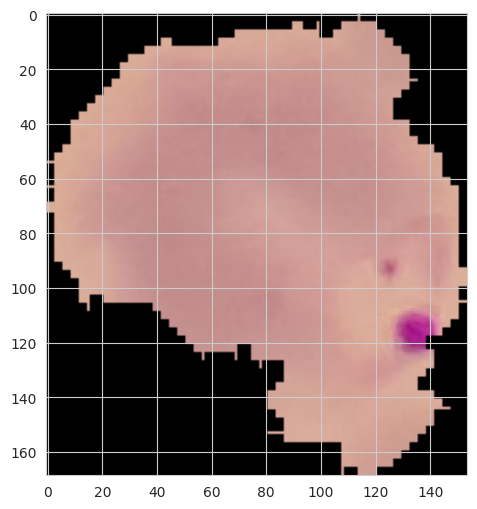

In [ ]:
plt.imshow(para_cell);
# imshow ile array formatındaki resmi artık okutabiliriz.

In [ ]:
para_cell.shape

(169, 154, 3)

In [ ]:
os.listdir(os.path.join(train_path, 'uninfected'))[:10]

['C97P58ThinF_IMG_20150917_145555_cell_88.png',
 'C209ThinF_IMG_20151029_160857_cell_126.png',
 'C183P144NThinF_IMG_20151201_223208_cell_89.png',
 'C5NThinF_IMG_20150609_122006_cell_3.png',
 'C101P62ThinF_IMG_20150918_151006_cell_17.png',
 'C91P52ThinF_IMG_20150821_123116_cell_102.png',
 'C48P9thinF_IMG_20150721_160944_cell_165.png',
 'C161P122ThinF_IMG_20151116_101403_cell_71.png',
 'C207ThinF_IMG_20151029_143952_cell_233.png',
 'C110P71ThinF_IMG_20150930_105319_cell_144.png']

In [ ]:
uninfected_cell_path = os.path.join(train_path, 'uninfected/', os.listdir(os.path.join(train_path, 'uninfected'))[5]) # 5.resmin yolu(uninfected)

In [ ]:
imread(uninfected_cell_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

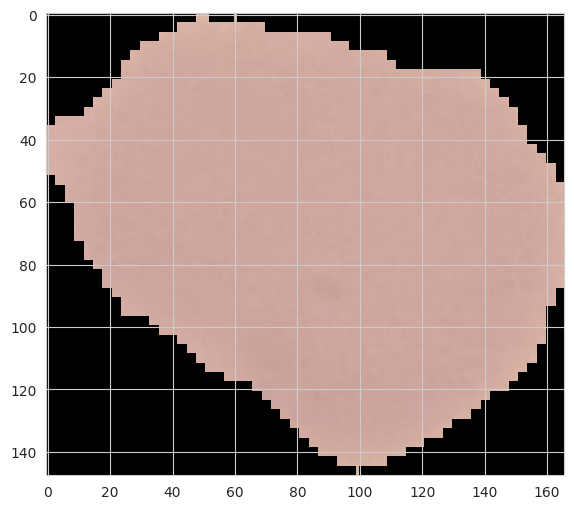

In [ ]:
uninfected_cell = imread(uninfected_cell_path)
plt.imshow(uninfected_cell);

In [ ]:
uninfected_cell.shape

(148, 166, 3)

In [ ]:
# View a random image
import random


def view_random_image(target_dir, target_class):
    """Returns a randomly selected image after displaying it,
    given directory path and class names.
    Args:
        target_dir (str): Relative path to the target directory
        target_class (str): The name of the target class to randomly select a picture from
    Returns:
        img (np.ndarray): Randomly selected image as np.ndarray
    """
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1) # 1 tane rastgele sample alıyoruz.

    # Read in the image and plot it using matplotlib
    img = imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")  # show the shape of the image

    return img

Image shape: (130, 121, 3)


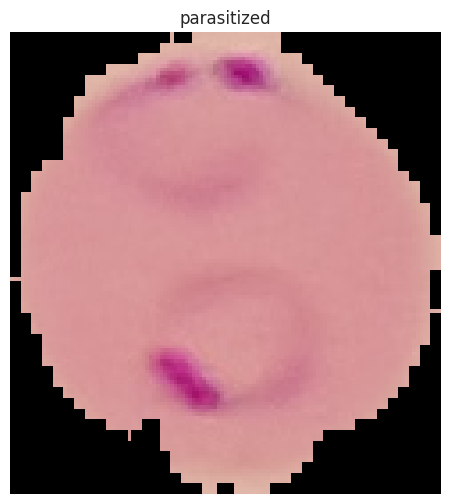

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="parasitized")

Image shape: (112, 103, 3)


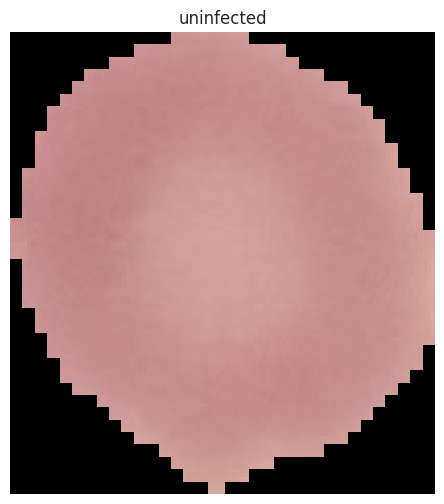

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="uninfected")

Image shape: (103, 109, 3)


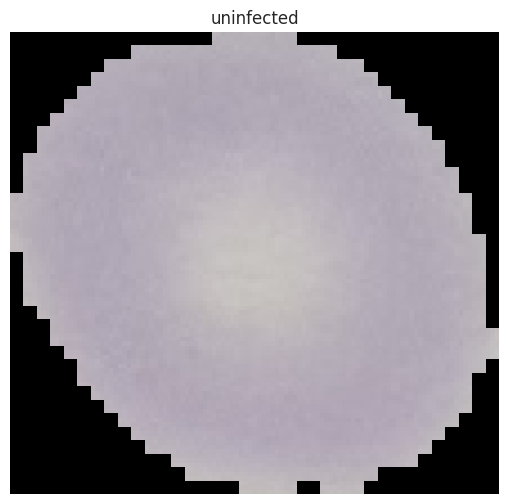

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names))  # class_names yukarıda tanımlamıştık.
  # class name'i de random seçmek için random.choice methodunu kullanıyoruz

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [ ]:
uninfected_cell.shape

(148, 166, 3)

In [ ]:
para_cell.shape

(169, 154, 3)

```python
x = []
y = []

for image in os.listdir(train_path+'uninfected'):
    img = imread(train_path+'uninfected/'+image)
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)
```

In [ ]:
x = [  imread(os.path.join(train_path, 'uninfected', image)).shape[0]
       for image in os.listdir(os.path.join(train_path, 'uninfected'))
       if 'Thumbs.db' not in image   ]


y = [
      imread(os.path.join(train_path, 'uninfected', image)).shape[1]
      for image in os.listdir(os.path.join(train_path, 'uninfected'))
      if 'Thumbs.db' not in image
]

In [ ]:
x[:5]

[133, 115, 118, 112, 151]

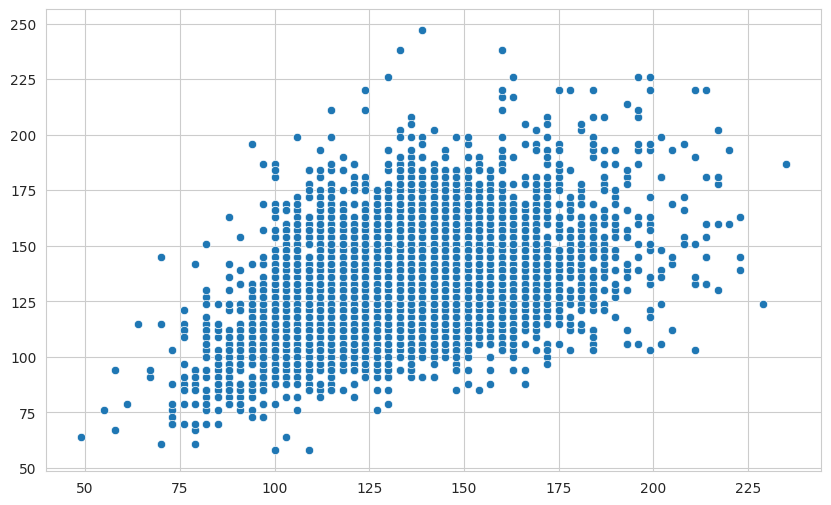

In [ ]:
sns.scatterplot(x=x, y=y);

In [ ]:
np.mean(x), np.median(x)

(131.64820899110507, 130.0)

In [ ]:
np.mean(y), np.median(y)

(131.4041990544114, 130.0)

In [ ]:
image_shape = (130, 130, 3)

# kullandığımız resimlerin boyutları çok büyük olursa overfite gidebiliyor modeller.Burada dağılıma bakarak bir karar verdik
# ama başka bir boyut da seçebilirdik,dağılıma bize bir fikir vermesi adına bakıyoruz.Mesela 140,140,3'te seçebilirdik.Şu anda resimlerin boyutlarında bir çevirme işlemi daha yapmadık !

## Scaling

**Let's check the images if they are needed to be scaled or not**

In [ ]:
uninfected_cell.max()

0.8627451

In [ ]:
para_cell.max()

0.9137255

As we see above, all images have already been scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# help(ImageDataGenerator)

In [ ]:
image_gen = ImageDataGenerator(rotation_range=15,             # resmi sağa veya sola max 15 dereceye kadar döndür
                               width_shift_range=0.10,        # resmin enini max %10 olacak şekilde kaydır
                               height_shift_range=0.10,       # resmin yüksekliğini max %10 olacak şekilde kaydır
                               # rescale=1/255,               # scale'e ihtiyaç varsa burada scale edebiliyoruz.
                               shear_range=0.1,               # resmin bir kısmını kırpmamızı sağlıyor max %10'nunu
                               zoom_range=0.1,                # zoom-in ya da zoom out da olabilir. max % 10'a kadar.
                               horizontal_flip=True,          # resme yatay eksende aynalama işlemi yap
                               fill_mode='nearest')           # kenarlarda oluşan boşlukları en yakındaki pikselle doldur.

In [ ]:
val_image_gen = ImageDataGenerator()

# validation datasıyla sadece modelin performansına bakacağız ondan dolayı modeli eğitirken yukarıdaki gibi işlemlerden geçmesini istemiyoruz;
# sadece scale'e ihtiyacımız varsa burada belirtebilirdik.

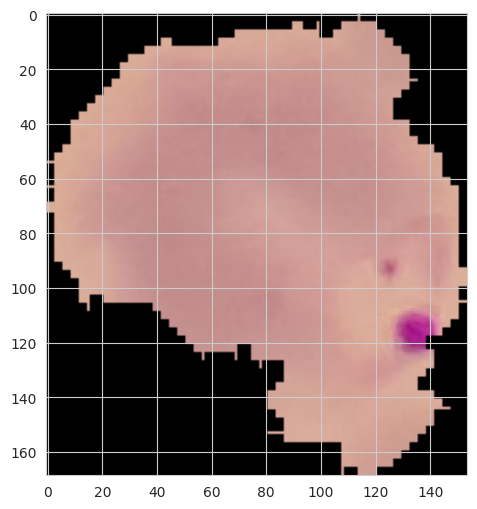

In [ ]:
plt.imshow(para_cell);

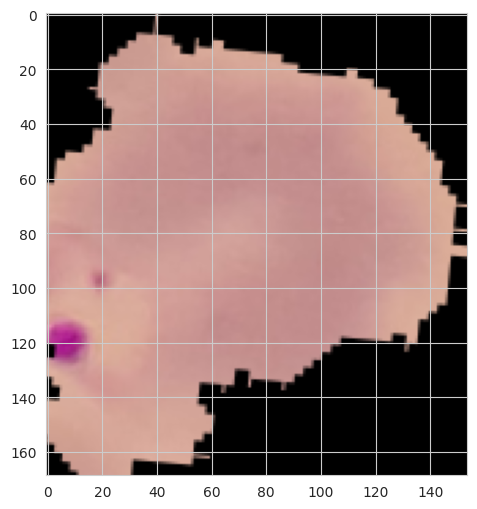

In [ ]:
plt.imshow(image_gen.random_transform(para_cell));

# image_gen diye bir object oluşturduk yukarıda , random_transform methoduyla her çalıştırdığımızda farklı transformlar yaptığını görebiliyoruz yukarıda verdiğimiz talimatlar doğrultusunda.

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [ ]:
# help(image_gen.flow_from_directory)
# Takes the path to a directory & generates batches of augmented data.

In [ ]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [ ]:
val_image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [ ]:
batch_size = 32

# ImageDataGenerator kullanıyorsak batch_size'ı fit içerisinde değil dışarıda belirliyoruz.

In [ ]:
image_shape

(130, 130, 3)

In [ ]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,          
                                                target_size=image_shape[:2],   # klasörlerden bu resimleri alırken (130,130)'a döndür
                                                color_mode='rgb',              # channel'ı burada belirtiyoruz
                                                batch_size=batch_size,         # modele bu image'ları verirken 32'li batch'ler halinde vereceğini söylüyoruz.
                                                class_mode='binary',           # elimizdeki data binary olduğu için bu şekilde belirtiyoruz
                                                shuffle=True)                  # shuffle=True ----> modelim eğitilirken hep parasitized ya da hep uninfected gelmesin de karışık gelsin diye.

Found 24958 images belonging to 2 classes.


In [ ]:
test_image_gen = val_image_gen.flow_from_directory(directory=test_path,         # val_image_gen'i kullanıyoruz burada !
                                                   target_size=image_shape[:2],
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='binary',
                                                   shuffle=False)

# modelimin performansını ölçerken her epoch sonunda bir eğitim olmadığından karışık gelmesine gerek yok (shuffle=False). +
# shuffle=True yaparsak eğer test datasıyla (actual) predictionları karşılaştırmak istediğimizde sıra bozulacağından doğru bir karşılaiştırma yapamayız.

Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices
## train_image_gen class isimlerini öğrenmiş ve 0/1 atamasını yapmış

{'parasitized': 0, 'uninfected': 1}

In [ ]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
train_image_gen
# Iterator bir veri tipi

In [ ]:
train_image_gen[0][0].shape

# resimleri batchler halinde şu anda hazırladı ve boyutlarını da bizim istediğimiz formata getirdi.Ama daha transform yapmadı !

(32, 130, 130, 3)

In [ ]:
train_image_gen[0][0][0].shape

(130, 130, 3)

In [ ]:
len(train_image_gen), len(test_image_gen)  # toplam batch sayısı

(780, 82)

In [ ]:
len(train_image_gen) * batch_size, len(test_image_gen) * batch_size

(24960, 2624)

In [ ]:
# Get a sample of the training data batch
images, labels = train_image_gen.next()  # get the 'next' batch of images/labels
len(images), len(labels)      # 32 image , 32 label

(32, 32)

In [ ]:
# Get a sample of the testing data batch
images, labels = test_image_gen.next()  # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))            # kernel_size --> filter_size
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)      

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode="min", patience=2, restore_best_weights=True)

In [ ]:
model1.fit(train_image_gen,                           # içerisine train_image_gen verdiğimize dikkat edelim.(X_train,y_train)
           epochs=10,
           steps_per_epoch=len(train_image_gen),      # her epochta 780 batch'imi de kullan diyorum.
           validation_data=test_image_gen,            # (X_test, y_test)
           validation_steps=len(test_image_gen),      # her epoch sonunda tüm validation datamı kullan diyorum
           callbacks=[early_stop])

# resimleri transform işlemi biz fit dediğimiz zaman olmaya başladı.eğitim esnasında transform yapıldığı için daha uzun sürüyor epochlarımız.

Epoch 1/10
780/780 [==============================] - 143s 181ms/step - loss: 1.1650 - accuracy: 0.5615 - val_loss: 0.6658 - val_accuracy: 0.6231
Epoch 2/10
780/780 [==============================] - 134s 172ms/step - loss: 0.6720 - accuracy: 0.5944 - val_loss: 0.6652 - val_accuracy: 0.6188
Epoch 3/10
780/780 [==============================] - 146s 187ms/step - loss: 0.6652 - accuracy: 0.6054 - val_loss: 0.6596 - val_accuracy: 0.6223
Epoch 4/10
780/780 [==============================] - 140s 179ms/step - loss: 0.6627 - accuracy: 0.6089 - val_loss: 0.7117 - val_accuracy: 0.5931
Epoch 5/10
780/780 [==============================] - 131s 167ms/step - loss: 0.6628 - accuracy: 0.6146 - val_loss: 0.6531 - val_accuracy: 0.6419
Epoch 6/10
780/780 [==============================] - 136s 175ms/step - loss: 0.6540 - accuracy: 0.6233 - val_loss: 0.6669 - val_accuracy: 0.6446
Epoch 7/10
780/780 [==============================] - 140s 179ms/step - loss: 0.6512 - accuracy: 0.6255 - val_loss: 0.6479 -

In [ ]:
model1.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.165,0.562,0.666,0.623
1,0.672,0.594,0.665,0.619
2,0.665,0.605,0.660,0.622
3,0.663,0.609,0.712,0.593
4,0.663,0.615,0.653,0.642


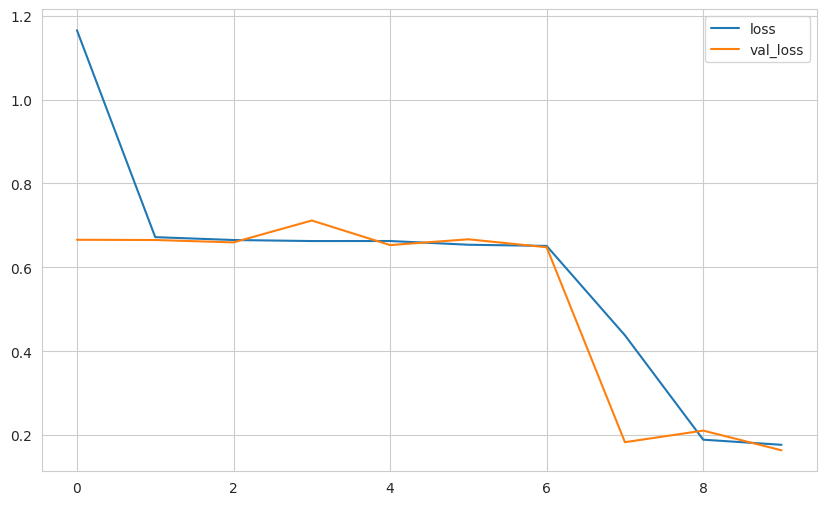

In [ ]:
summary[["loss", "val_loss"]].plot();

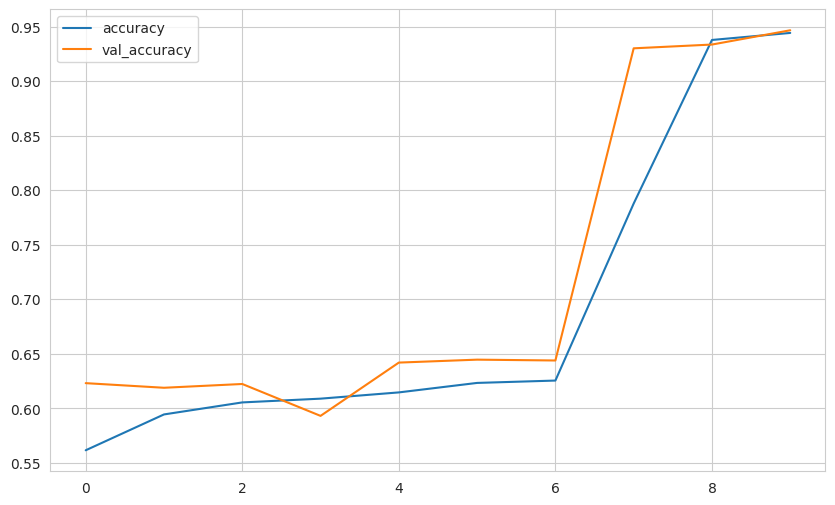

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
score = model1.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 3s 36ms/step - loss: 0.1642 - accuracy: 0.9465
Test loss: 0.16415049135684967
Test accuracy: 0.9465384483337402


In [ ]:
pred_prob = model1.predict(test_image_gen)  # test_image_gen 

82/82 [==============================] - 3s 35ms/step


In [ ]:
pred_prob

array([[0.00176534],
       [0.00027837],
       [0.00004849],
       ...,
       [0.9966979 ],
       [0.99902713],
       [0.99816614]], dtype=float32)

In [ ]:
y_pred = pred_prob > 0.5

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_test = test_image_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [ ]:
confusion_matrix(y_test, y_pred)

array([[1216,   84],
       [  55, 1245]])

# Modelling-2

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=64,
                  kernel_size=(3, 3),
                  input_shape=image_shape,
                  padding='same',
                  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(Conv2D(filters=128,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(Conv2D(filters=256,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(Conv2D(filters=256,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 130, 130, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 65, 65, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 65, 65, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 65, 65, 128)       147584    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 256)      

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode="min",patience=4, restore_best_weights=True)

In [ ]:
model2.fit(train_image_gen,
           epochs=15,
           steps_per_epoch=len(train_image_gen),
           validation_data=test_image_gen,
           validation_steps=len(test_image_gen),
           callbacks=[early_stop])

Epoch 1/15
780/780 [==============================] - 56s 71ms/step - loss: 0.5355 - accuracy: 0.7022 - val_loss: 0.1791 - val_accuracy: 0.9465
Epoch 2/15
780/780 [==============================] - 55s 70ms/step - loss: 0.1748 - accuracy: 0.9478 - val_loss: 0.1544 - val_accuracy: 0.9512
Epoch 3/15
780/780 [==============================] - 55s 70ms/step - loss: 0.1674 - accuracy: 0.9506 - val_loss: 0.1681 - val_accuracy: 0.9473
Epoch 4/15
780/780 [==============================] - 56s 71ms/step - loss: 0.1600 - accuracy: 0.9504 - val_loss: 0.1471 - val_accuracy: 0.9500
Epoch 5/15
780/780 [==============================] - 55s 71ms/step - loss: 0.1608 - accuracy: 0.9516 - val_loss: 0.1571 - val_accuracy: 0.9515
Epoch 6/15
780/780 [==============================] - 56s 71ms/step - loss: 0.1597 - accuracy: 0.9522 - val_loss: 0.1627 - val_accuracy: 0.9519
Epoch 7/15
780/780 [==============================] - 53s 68ms/step - loss: 0.1506 - accuracy: 0.9540 - val_loss: 0.1608 - val_accuracy:

In [ ]:
model2.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.536,0.702,0.179,0.947
1,0.175,0.948,0.154,0.951
2,0.167,0.951,0.168,0.947
3,0.160,0.950,0.147,0.950
4,0.161,0.952,0.157,0.952


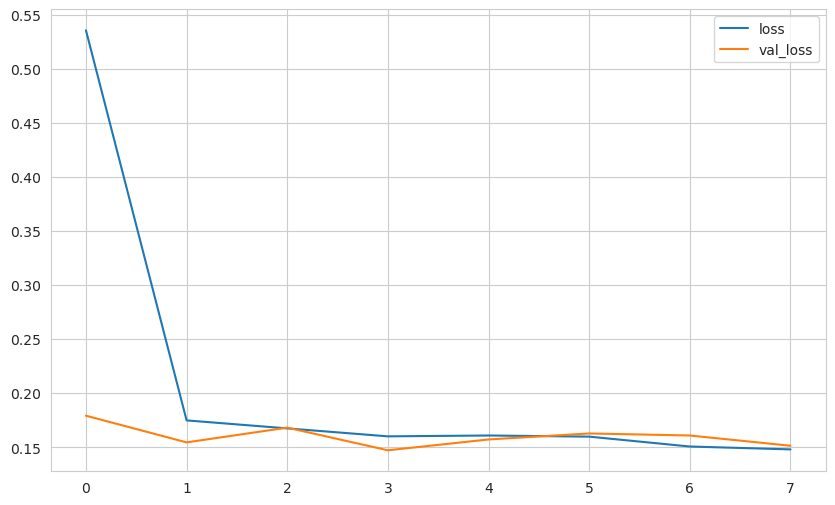

In [ ]:
summary[["loss", "val_loss"]].plot()
plt.show()

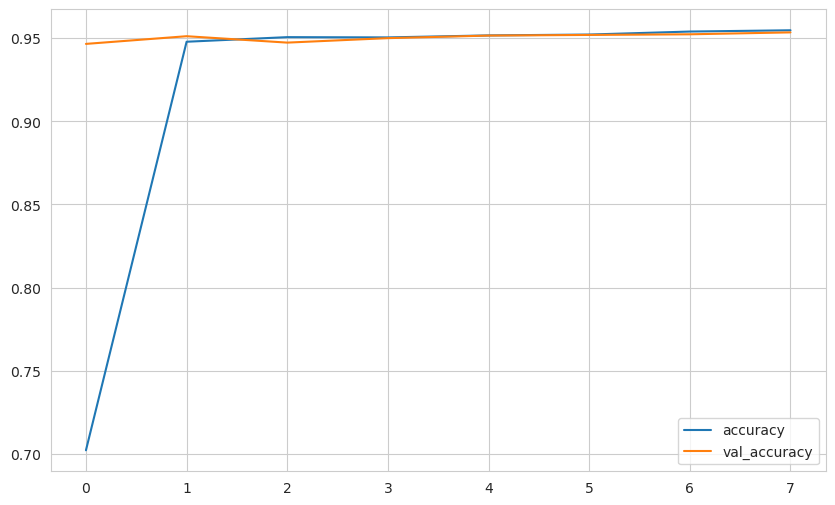

In [ ]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [ ]:
score = model2.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 1s 16ms/step - loss: 0.1471 - accuracy: 0.9500
Test loss: 0.1471390426158905
Test accuracy: 0.949999988079071


In [ ]:
pred_prob = model2.predict(test_image_gen)

82/82 [==============================] - 1s 16ms/step


In [ ]:
y_pred = pred_prob > 0.5

In [ ]:
print(classification_report(y_test, y_pred))   # y_test yukarıda oluşturmuştuk zaten

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1300
           1       0.96      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [ ]:
confusion_matrix(y_test, y_pred)

array([[1243,   57],
       [  73, 1227]])

In [ ]:
model1.save('malaria_model.h5')

# Prediction

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('malaria_model.h5')

In [ ]:
target_class = random.choice(class_names)
target_class

'uninfected'

In [ ]:
random_image = random.sample(
    os.listdir(os.path.join(test_path, target_class)),
    1)
random_image

['C237ThinF_IMG_20151127_104844_cell_244.png']

In [ ]:
image_path = os.path.join(test_path, target_class, random_image[0])
image_path

'cell_images/test/uninfected/C237ThinF_IMG_20151127_104844_cell_244.png'

In [ ]:
my_image = image.load_img(image_path, target_size=image_shape)   # resmi çağırırken image_shape ile modelimin eğitldiği boyuta getiriyorum.

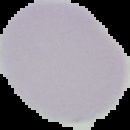

In [ ]:
my_image

In [ ]:
type(my_image)

PIL.Image.Image

In [ ]:
# my_image = np.array(my_image)
my_image = image.img_to_array(my_image)  # array'e çeviriyoruz 

In [ ]:
my_image.shape

(130, 130, 3)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)   # modelimi batchler halinde eğittiğimden kaç tane fotoğrafı tahmin edeceğini belirtmemiz gerekiyor.

In [ ]:
my_image.shape

(1, 130, 130, 3)

In [ ]:
model.predict(my_image)

1/1 [==============================] - 0s 189ms/step


array([[0.99652076]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
def pred_and_plot(model, img_size):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    target_class = random.choice(class_names)
    random_image = random.sample(
        os.listdir(os.path.join(test_path, target_class)),
        1)
    img_path = os.path.join(test_path, target_class, random_image[0])
    img = image.load_img(img_path, target_size=img_size)
    img = np.array(img)

    # Make a prediction
    pred = model.predict(np.expand_dims(img, axis=0))
    print("prediction_probability: ", pred.max())   

    # Get the predicted class
    if len(pred[0]) > 1:  # check for multi-class
        pred_class = class_names[pred.argmax()]  # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])]  # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 27ms/step
prediction_probability:  0.0030009814


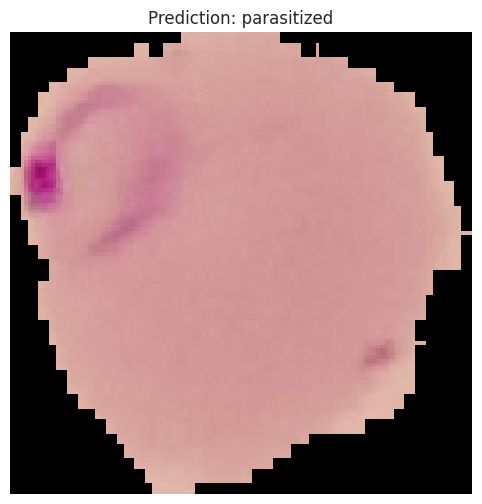

In [ ]:
pred_and_plot(model, (130, 130))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___